In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
lv_library = pd.read_csv("Louisville_Library.csv")
print(lv_library.head())

    BibNum                                              Title  \
0   707409  Jeff Immelt and the new GE way : innovation, t...   
1  1341361           McGraw-Hill's American idioms dictionary   
2   707411  Robin rescues dinner : 52 weeks of quick-fix m...   
3  1341362  McGraw-Hill's essential ESL grammar : a handbo...   
4   707411  Robin rescues dinner : 52 weeks of quick-fix m...   

                 Author          ISBN  PublicationYear ItemType  \
0   Magee, David, 1965-  9.780070e+12             2009     Book   
1    Spears, Richard A.  9.780070e+12             2007     Book   
2  Miller, Robin, 1964-  9.780310e+12             2009     Book   
3         Lester, Mark.  9.780070e+12             2008     Book   
4  Miller, Robin, 1964-  9.780310e+12             2009     Book   

      ItemCollection   ItemLocation  ItemPrice              ReportDate  \
0  Adult Non-Fiction           Main      25.95  2022/07/01 04:00:00+00   
1     ELL Collection  South Central      20.00  2022/07/01

In [32]:
# deleted unnecassary columns

lv_library = lv_library.drop(columns = ['BibNum', 'ObjectId', 'ReportDate']) 

In [33]:
# checked duplicated row and drop dublications

lv_library.duplicated().sum() 
lv_library = lv_library.drop_duplicates() 

In [34]:
lv_library.dtypes # checked data types

Title               object
Author              object
ISBN               float64
PublicationYear      int64
ItemType            object
ItemCollection      object
ItemLocation        object
ItemPrice          float64
dtype: object

In [35]:
# converted data types 

lv_library['Title'] = lv_library['Title'].astype('string')
lv_library['Author'] = lv_library['Author'].astype('string')
lv_library['ISBN'] = lv_library['ISBN'].astype('string')
lv_library['PublicationYear'] = pd.to_numeric(lv_library['PublicationYear'], errors= 'coerce')
lv_library['ItemType'] = lv_library['ItemType'].astype('category')
lv_library['ItemCollection'] = lv_library['ItemCollection'].astype('category')
lv_library['ItemLocation'] = lv_library['ItemLocation'].astype('category')
lv_library['ItemPrice'] = pd.to_numeric(lv_library['ItemPrice'], errors= 'coerce')

In [36]:
#checking missing values
lv_library.isna().sum()

Title                   1
Author             106115
ISBN               113950
PublicationYear         0
ItemType                0
ItemCollection        102
ItemLocation            0
ItemPrice               0
dtype: int64

In [37]:
# Cleaned ItemType column

lv_library['ItemType'].unique()
lv_library['ItemType'].value_counts()

ItemType
Book                                    687456
DVD                                      45798
Ebook                                    38150
Music CD                                 32114
Audio Book on CD                         27851
Large Print                              21959
Eaudiobook                                8195
Serial                                    6409
Microform                                 5816
Audio Books                               5489
Emagazine                                 1551
Blu-ray Disc                               938
Streaming Video                            922
Kit                                        846
Videorecording                             801
Musical Sound Recording                    380
Electronic Resources                       349
Printed Music                              345
Recorded Events                            260
Atlas                                      181
Book + DVD                                 155
Stre

In [38]:
books = ['Book', 'Large Print', 'Printed Music', 'Atlas', 'Printed Cartographic Material', 'Braille', 'Manuscript Material', 'Serial', 'Microform', 'Archival/Mixed Materials', 'Manuscript Music']

audiobooks = ['Audio Book on CD', 'Audio Books', 'Eaudiobook']

music = ['Music CD', 'Musical Sound Recording', 'Sound Recording', 'Streaming Music']
video =['DVD', 'Blu-ray Disc', 'Blu-ray + DVD', 'Videorecording', 'Videotape', 'Streaming Video']
digital = ['Ebook', 'Emagazine', 'Electronic Resources']
mixed_media = ['Book + DVD', 'Book + CD', 'Kit', 'Three Dimensional Object (Artifact)' ]
other = ['Two Dimensional Nonprojected Graphic', 'Map', 'Recorded Events', 'Projected Medium']


In [39]:
# it has 35 diffrent item types and seems like some of the almost same. Therefore, I decided to mapping it.
def categorize_itemtype(x):
    if x in books:
        return 'Book'
    if x in audiobooks:
        return 'Audiobook'
    if x in music:
        return 'Music'
    if x in video:
        return 'Video'
    if x in digital:
        return 'Digital Reading'
    if x in mixed_media:
        return 'Mixed media'
    return 'Other'


lv_library['ItemTypeClean'] = lv_library['ItemType'].apply(categorize_itemtype)
set(lv_library['ItemType']) - set(books + audiobooks + music + video + digital + mixed_media + other)

set()

In [40]:
lv_library.groupby('ItemTypeClean').size().sort_values(ascending=False)


ItemTypeClean
Book               722285
Video               48467
Audiobook           41535
Digital Reading     40050
Music               32617
Mixed media          1038
Other                 365
dtype: int64

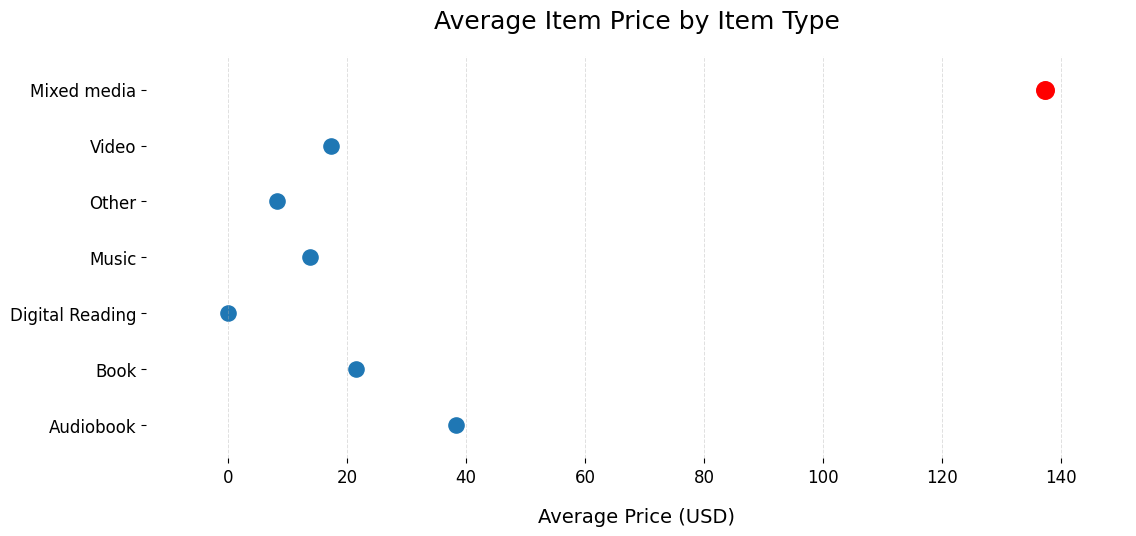

In [41]:
mean_price = (
    lv_library.groupby('ItemTypeClean')['ItemPrice']
    .mean()
    )

Q1 = mean_price.quantile(0.25)
Q3 = mean_price.quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5 * IQR
is_outlier = mean_price > upper_bound
outlier_label = mean_price[is_outlier].index


plt.figure(figsize=(12,6))

plt.scatter(mean_price[~is_outlier].values, 
            mean_price[~is_outlier].index, 
            color='#1f77b4',
            s = 120,
            ) 

plt.scatter(mean_price[is_outlier].values, 
            mean_price[is_outlier].index, 
            color='red',
            s = 160,
            )

plt.title("Average Item Price by Item Type", fontsize = 18, pad =20) 
plt.xlabel("Average Price (USD)", fontsize = 14, labelpad = 15) 


for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.margins(x=0.1, y=0.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis = 'x', linestyle = '--', alpha = 0.4, linewidth = 0.7)
plt.tight_layout(pad=3)

plt.show()

In [42]:
lv_library.groupby('PublicationYear').size().sort_index()
lv_library[lv_library['PublicationYear'] < 1500].value_counts()

Title                                      Author                ISBN             PublicationYear  ItemType     ItemCollection                ItemLocation          ItemPrice  ItemTypeClean
"R" is for ricochet                        Grafton, Sue.         9780790000000.0  0                Large Print  Large Print                   Jeffersontown         32.95      Book             1
                                                                                                                                              Main                  32.95      Book             1
                                                                                                                                              Southwest             32.95      Book             1
'Twas the day after Thanksgiving.          Smith, Mavis.         9780690000000.0  0                Book         Children's Picture Paperback  Jeffersontown         5.99       Book             1
                                   

CHART 1: Library Collection by Publication Decade


1. Question or idea: 
        This chart shows how the library grew over time.

2. Chart type :
        Line chart fits because it shows trends clearly.

3. Design choices (color, labels, order, scale):
        I kept it clean: soft colors, clear labels, honest scale.

4. How you ensured accuracy and avoided misleading design:
        No tricks—every decade is shown, nothing exaggerated.

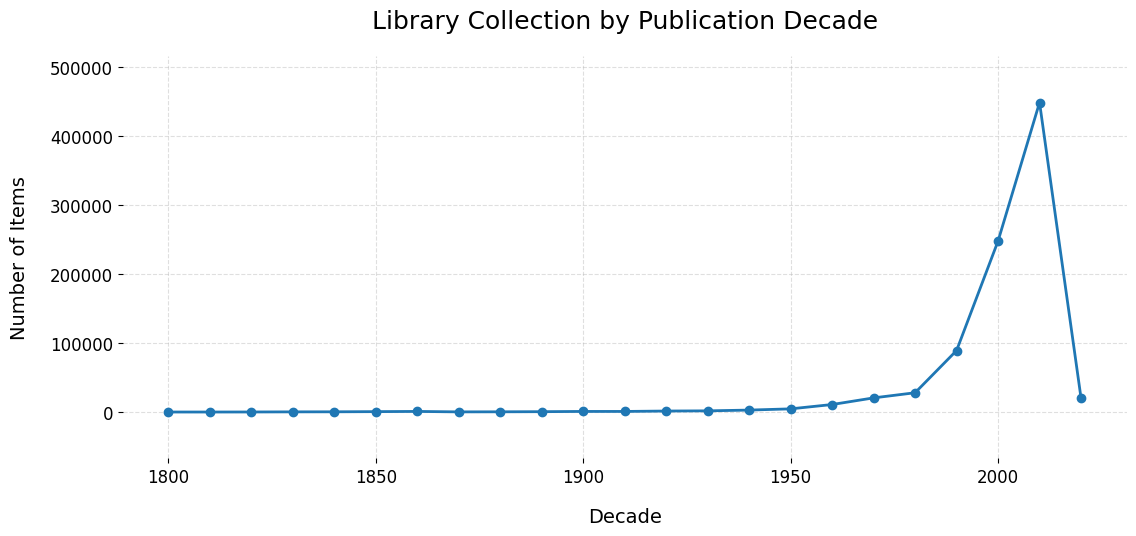

In [43]:
lv_library = lv_library[
    (lv_library['PublicationYear'] >= 1800) &
    (lv_library['PublicationYear'] <= 2026)
    ]
lv_library['PublicationYear'].describe()
lv_library['Decade'] = (lv_library['PublicationYear'] // 10) * 10
decade_counts = lv_library.groupby('Decade').size().sort_index()

plt.figure(figsize=(12,6)) 
plt.plot (decade_counts.index, decade_counts.values,
          marker = 'o',
          linewidth = 2,
          color = '#1f77b4') 
plt.title('Library Collection by Publication Decade', fontsize = 18, pad =20) 
plt.xlabel('Decade', fontsize = 14, labelpad = 15) 
plt.ylabel('Number of Items', fontsize = 14, labelpad = 15)

for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.margins(x=0.05, y=0.15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle = '--', alpha = 0.4)
plt.tight_layout(pad=3)
plt.show()


CHART 2: Library Collection by Location


1. Question or idea: 
   This chart shows how the library’s collection grew by decade.

2. Chart type: 
   Line chart works well to show change over time.

3. Design  (color, labels, order, scale): 
   I used soft colors, clear labels, and honest scale.
   
4. How you ensured accuracy and avoided misleading design: 
   All decades are shown no exaggeration, no missing data.

C:\Users\vbyam\AppData\Local\Temp\ipykernel_18796\945293667.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_counts = lv_library.groupby('ItemLocation').size().sort_values()


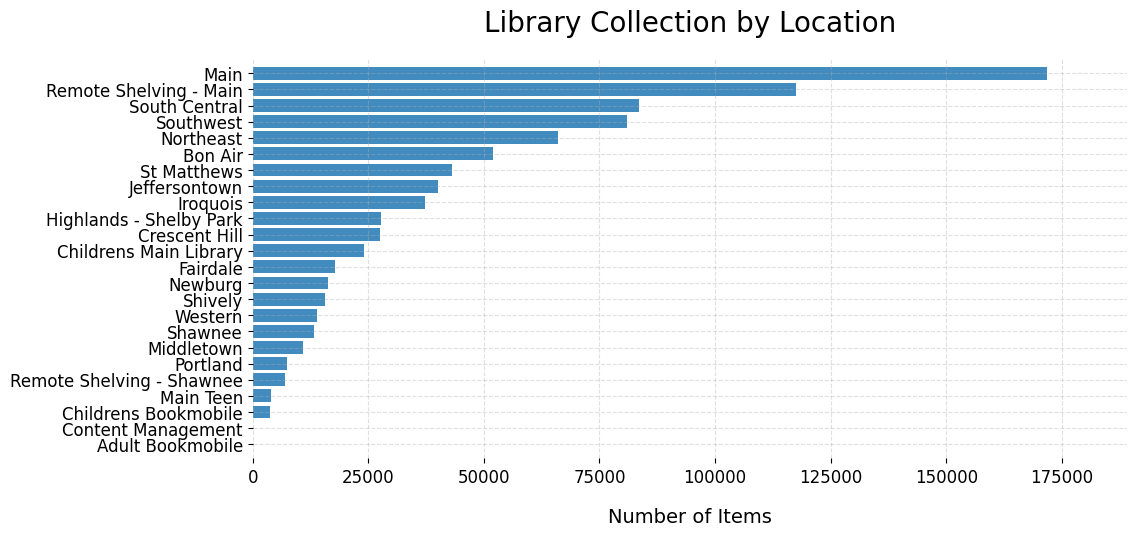

In [44]:
location_counts = lv_library.groupby('ItemLocation').size().sort_values()


plt.figure(figsize=(12,6))

plt.barh(location_counts.index, location_counts.values,
          alpha = 0.85,
          color = '#1f77b4') 
plt.title('Library Collection by Location', fontsize = 20, pad =20) 
plt.xlabel('Number of Items', fontsize = 14, labelpad = 15)

for spine in ['top', 'right', 'left', 'bottom']:
    plt.gca().spines[spine].set_visible(False)

plt.margins(x=0.1, y=0.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle = '--', alpha = 0.4)
plt.tight_layout(pad=3)
plt.show()




CHART 3: Relationship Year vs Item Price


1. Question or idea:
    This chart shows how item prices change over time.

2. Chart type is appropriate:
    Scatter plot works because it shows every item, and the regression trend line shows the overall trend.
3. Design choices(color, labels, order, scale):
    I kept it clean with soft dots, a clear red trend line, and honest axes.

4. How you ensured accuracy and avoided misleading design:
    Nothing is hidden or exaggerated — all points are shown and the scale is fair.

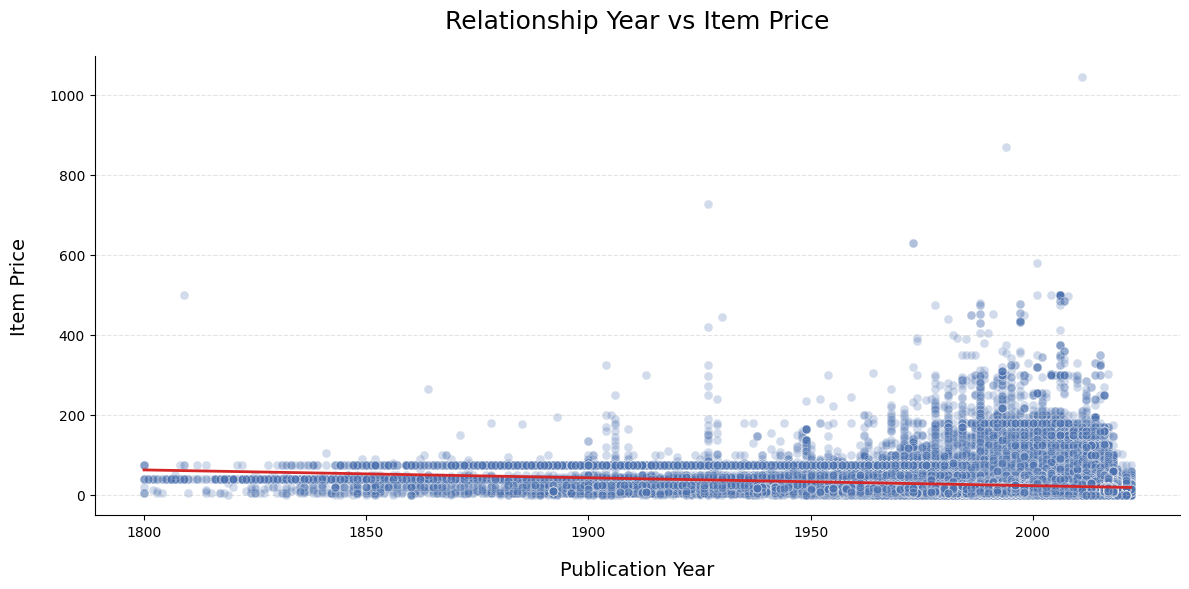

In [45]:
lv_library= lv_library[
    (lv_library['PublicationYear'] >= 1800) &
    (lv_library['PublicationYear'] <= 2026)]


plt.figure(figsize=(12,6)) 
sns.scatterplot( data=lv_library, 
                x="PublicationYear", 
                y="ItemPrice", 
                alpha=0.25,
                s = 40,
                color = '#4C72B0' 
                ) 


sns.regplot( 
            data=lv_library, 
            x="PublicationYear", 
            y="ItemPrice", 
            scatter=False, 
            color="#D62728", 
            ci = None,
            line_kws={"linewidth": 2}
    )
plt.title("Relationship Year vs Item Price", fontsize =18, pad = 20) 
plt.xlabel("Publication Year", fontsize = 14, labelpad=15) 
plt.ylabel("Item Price", fontsize = 14, labelpad=15) 

plt.grid(axis='y', linestyle = '--', alpha = 0.35)

sns.despine()
plt.tight_layout()
plt.show()

CHART 4: Average Item Price by Decade


1. Question or idea: This chart shows how item prices changed over time.

2. Chart type: It uses dots for each item and a smooth line to show the overall pattern.

3. Design choise (color, labels, order, scale): Soft colors, clear labels, fair scale.

4. How you ensured accuracy and avoided misleading design: 
    All data is shown no exaggeration, no missing years.

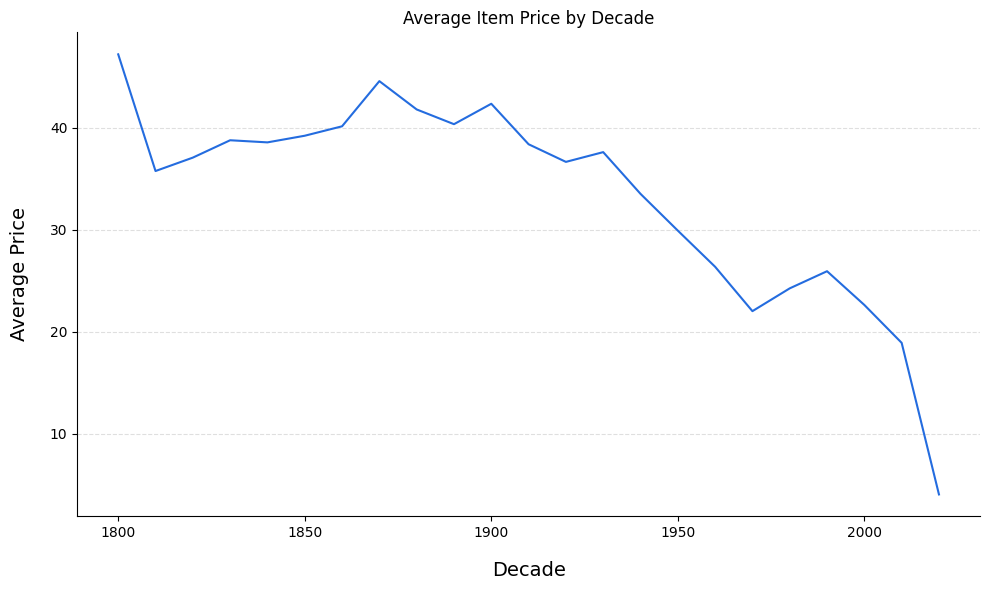

In [46]:
lv_library.groupby('Decade')['ItemPrice'].mean().plot(
    kind='line',
    color='#246CDF',
    figsize=(10,6),
    title='Average Item Price by Decade'
    )

plt.ylabel('Average Price',fontsize = 14, labelpad=15)
plt.xlabel('Decade',fontsize = 14, labelpad=15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

sns.despine()
plt.tight_layout()
plt.show()


WEEK 4 Progress 